# **Lab 2 - 38615: Computational Modeling, Statistical Analysis and Machine Learning in Science**

Name: Shivam Mishra <br>
Andrew ID: shivammi

## 1. Loading libraries and Data

In [1]:
# importing the necessary libraries for analysis
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook as tqdm
import plotly.express as px
%matplotlib inline
plt.style.use('bmh')
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
import umap.plot

In [2]:
f_name = '/Users/shivam/Desktop/CMU/Fall22/38615 - Computational Modeling, Stats/Assignment/Lab2_clustering_dataset.csv'
data = pd.read_csv(f_name)
print(f"Size of the dataset is: {data.shape}")
data.head()

Size of the dataset is: (969, 1025)


ID  D_0  D_1  D_2  D_3  D_4  D_5  D_6  D_7  D_8  \
0  AAEAMMIUQZAASJ-MRXNPFEDSA-N    1    1    1    1    1    1    1    0    1   
1  AAEFNWQXBPYXAC-UHFFFAOYSA-N    1    1    1    1    0    1    1    1    0   
2  AAMHSIWFDKXUMZ-UHFFFAOYSA-N    1    1    1    1    1    1    0    1    1   
3  AAPQXEOSVSLLMB-UHFFFAOYSA-N    1    1    1    1    0    1    1    1    1   
4  AARXXEHXOBTROW-UHFFFAOYSA-N    1    1    1    1    1    1    1    0    1   

   ...  D_1014  D_1015  D_1016  D_1017  D_1018  D_1019  D_1020  D_1021  \
0  ...       1       1       1       1       1       1       0       1   
1  ...       1       0       1       1       1       0       0       1   
2  ...       1       1       1       1       1       1       0       0   
3  ...       1       1       1       1       1       1       1       1   
4  ...       1       1       1       1       1       1       0       1   

   D_1022  D_1023  
0       1       1  
1       1       1  
2       1       1  
3       1       1  
4       1       1  

[5 rows x 1025 columns]

## 2. Data Descriptions and Analysis of Columns

### 2.A. Collecting basic informaiton about the dataset 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB


In [4]:
data.describe()

D_0         D_1    D_2    D_3         D_4    D_5         D_6  \
count  969.0  969.000000  969.0  969.0  969.000000  969.0  969.000000   
mean     1.0    0.900929    1.0    1.0    0.684211    1.0    0.764706   
std      0.0    0.298912    0.0    0.0    0.465070    0.0    0.424402   
min      1.0    0.000000    1.0    1.0    0.000000    1.0    0.000000   
25%      1.0    1.000000    1.0    1.0    0.000000    1.0    1.000000   
50%      1.0    1.000000    1.0    1.0    1.000000    1.0    1.000000   
75%      1.0    1.000000    1.0    1.0    1.000000    1.0    1.000000   
max      1.0    1.000000    1.0    1.0    1.000000    1.0    1.000000   

             D_7         D_8         D_9  ...      D_1014      D_1015  D_1016  \
count  969.00000  969.000000  969.000000  ...  969.000000  969.000000   969.0   
mean     0.68937    0.570691    0.373581  ...    0.860681    0.737874     1.0   
std      0.46299    0.495233    0.484004  ...    0.346458    0.440018     0.0   
min      0.00000    0.000000    0.000000  ...    0.000000    0.000000     1.0   
25%      0.00000    0.000000    0.000000  ...    1.000000    0.000000     1.0   
50%      1.00000    1.000000    0.000000  ...    1.000000    1.000000     1.0   
75%      1.00000    1.000000    1.000000  ...    1.000000    1.000000     1.0   
max      1.00000    1.000000    1.000000  ...    1.000000    1.000000     1.0   

           D_1017      D_1018      D_1019      D_1020      D_1021      D_1022  \
count  969.000000  969.000000  969.000000  969.000000  969.000000  969.000000   
mean     0.881321    0.854489    0.681115    0.553148    0.809082    0.821465   
std      0.323577    0.352797    0.466285    0.497424    0.393228    0.383160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    0.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           D_1023  
count  969.000000  
mean     0.912281  
std      0.283032  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 1024 columns]

In [5]:
# list of all the column names saved in a list
col_list = data.iloc[:,1:].columns.to_list()

In [6]:
data_check = data[col_list].copy()

In [7]:
# Check the missing values across all the columns
data_check.isna().sum().sort_values(ascending=False)

D_0       0
D_1       0
D_674     0
D_675     0
D_676     0
         ..
D_346     0
D_347     0
D_348     0
D_349     0
D_1023    0
Length: 1024, dtype: int64

**There are no missing or NaN values in the dataset.**

In [8]:
# Get a list of all the unique values for each column vector
print(data_check.nunique().sort_values(ascending=False))

D_512    2
D_659    2
D_661    2
D_662    2
D_663    2
        ..
D_760    1
D_252    1
D_750    1
D_255    1
D_0      1
Length: 1024, dtype: int64


**Drop all the columns which have the same value throughout all the rows**

In [9]:
nunique = data_check.nunique()
cols_to_drop = nunique[nunique == 1].index
data_check.drop(cols_to_drop, axis=1, inplace=True)
print(f"Size of the dataset after removing dummy features: {data_check.shape}")

Size of the dataset after removing dummy features: (969, 950)


**Observation:**
Since all the features have only two possible values now, so we need not perform any feature scaling on them.

## 3. Plot Functions: 
**A bunch of graph plot function for PCA, t-SNE and UMAP**

### 3.A. Principal Component Analysis Plot Function

In [10]:
## PCA Visualizing for clustering 

pca_data = PCA(n_components=2, svd_solver='full', random_state=501)
principalComponents_data = pca_data.fit_transform(data_check)

data_pca = data_check.copy()
data_pca['p_component1'] = principalComponents_data[:,0]
data_pca['p_component2'] = principalComponents_data[:,1]

In [11]:
def plot_pca(color_label, cluster_type, data_pca=data_pca):
    # color_label = color_label.astype(str)
    fig = px.scatter(data_pca, x='p_component1', y='p_component2', color=color_label, color_continuous_scale='jet', 
                     width=1000, height=600, title=f"PCA graph for {cluster_type} Clustering")
    fig.show()

### 3.B. t-Distributed Stochastic Neighbor Embedding (t-SNE) Plot Function

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=60, random_state=501, init='random')
tsne_results = tsne.fit_transform(data_check)

data_tsne = data_check.copy()
data_tsne['tsne_2d_one'] = tsne_results[:,0]
data_tsne['tsne_2d_two'] = tsne_results[:,1]

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 969 samples in 0.001s...
[t-SNE] Computed neighbors for 969 samples in 0.077s...
[t-SNE] Computed conditional probabilities for sample 969 / 969
[t-SNE] Mean sigma: 5.122549
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.051357
[t-SNE] KL divergence after 1000 iterations: 0.201680


In [13]:
def plot_tsne(color_label, cluster_type, data_tsne=data_tsne):
    # color_label = color_label.astype(str)
    
    fig = px.scatter(
        data_tsne, x='tsne_2d_one', y='tsne_2d_two',
        color=color_label, title=f"t-SNE graph for {cluster_type} Clusterning",
        color_continuous_scale = 'Spectral',
        render_mode='auto',
        width=1000, height=600
    )
    fig.show()

### 3.C. UMAP Plot Function

In [14]:
umap_2d = UMAP(n_components=2, init='random', random_state=501, n_neighbors=50, target_metric='l2')
proj_2d = umap_2d.fit_transform(data_check)

In [15]:
def plot_umap(color_label, cluster_type, proj_2d=proj_2d):
    # color_label = color_label.astype(str)
    
    fig_2d = px.scatter(
        proj_2d, x=0, y=1,
        color=color_label,
        color_continuous_scale='jet',
        render_mode='auto',
        width=1000, height=600,
        title = f"UMAP for {cluster_type} Clusterning"
    )
    fig_2d.show()

## 4. K-Means Clustering

### 4.A **Simple Implementation**

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(data_check)

KMeans(n_clusters=2, random_state=0)

In [17]:
kmeans.cluster_centers_

array([[0.85343511, 0.53282443, 0.6519084 , ..., 0.71755725, 0.73587786,
        0.87022901],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [18]:
kmeans.inertia_

132780.33626683542

### 4.B **Elbow Method** for k estimation

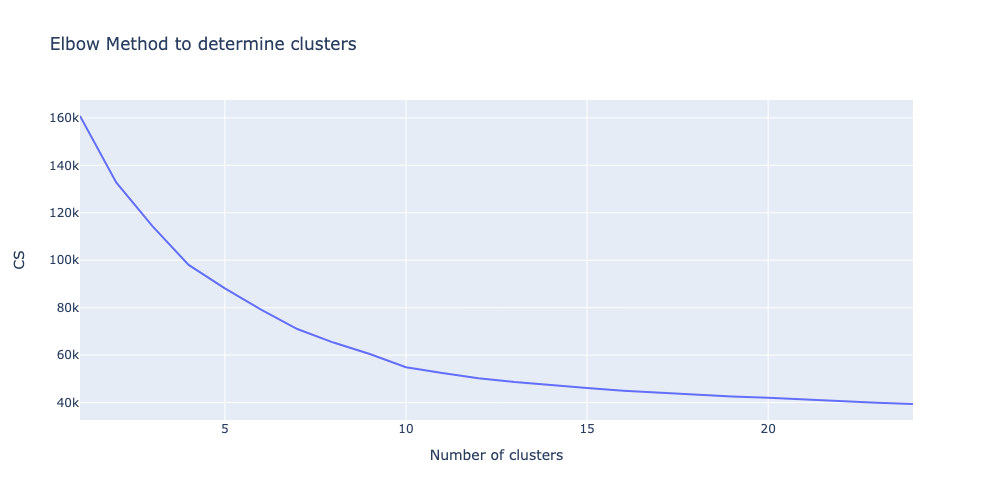

In [19]:
cs = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_check)
    cs.append(kmeans.inertia_)

# create a line graph to detemine the appropriate cluster for k-means
fig = px.line(x=range(1,25), y=cs, width=1000, height=500, title="Elbow Method to determine clusters", 
              labels={'x': 'Number of clusters', 'y':'CS'})
fig.show()

From this analysis, it can be identified that **k=10 is the eblow point**. 

### 4.C **Silhouette Analysis**
Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a **measure of how close each point in one cluster is to points in the neighboring clusters** and thus provides a way to assess parameters like number of clusters visually. This measure has a **range of [-1, 1]**. <br>
Silhouette coefficients (as these values are referred to as) **near +1 indicate that the sample is far away from the neighboring clusters**. **A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster**.

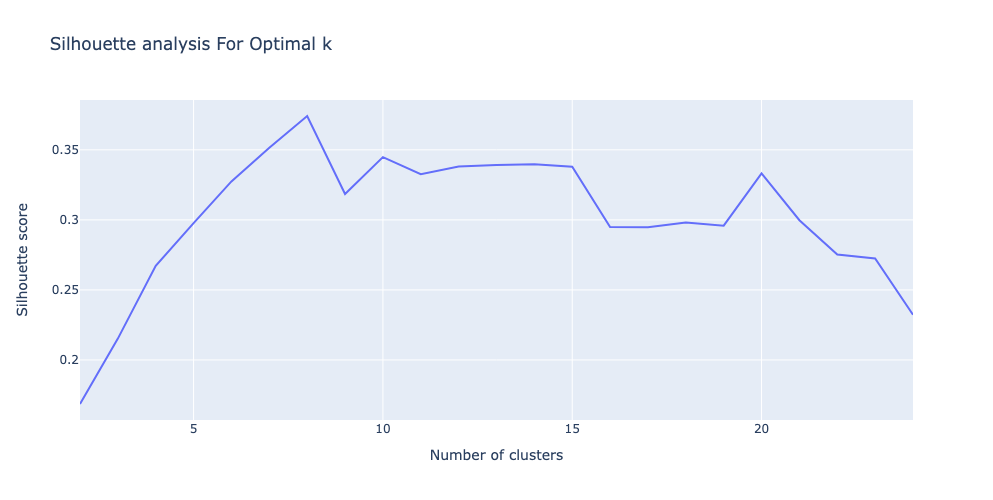

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = np.arange(2,25)
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_check)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(data_check, cluster_labels))

# plt.plot(range_n_clusters,silhouette_avg,'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

# create a line graph to detemine the appropriate cluster for k-means
fig = px.line(x=range_n_clusters, y=silhouette_avg, width=1000, height=500, title="Silhouette analysis For Optimal k", 
              labels={'x': 'Number of clusters', 'y':'Silhouette score'})
fig.show()

***Note:*** The Silhouette Method is used in combination with the Elbow Method for a more confident decision. <br>
From the results obtained for the two methods, we can confidently take any **k value between 8 to 15**. Combining the best k values from both the methods, I am taking **K=10 as optimum k cluster**. 

### 4.D **K-Means Simulations**

In [21]:
def k_means(data, n_clusters=10):
    
    # Creating model instance for K-Means
    kmeans = KMeans(n_clusters = n_clusters, random_state=0)
    kmeans.fit(data)
    
    y_means = kmeans.predict(data)
    
    print(f"Intertia of K-Means for {n_clusters} clusters is: {kmeans.inertia_}")
    
    # Graph the plots for calculating cluster size and distribution
    plt.figure(figsize=(10,6))
    ax = sns.countplot(y_means)
    ax.set_title("K-Means Clusters", fontsize="xx-large", y=1.05)
    ax.set_xlabel("Clusters")
    ax.set_ylabel("Counts")
    plt.show()
    
    return y_means;

Intertia of K-Means for 10 clusters is: 54902.71774572476


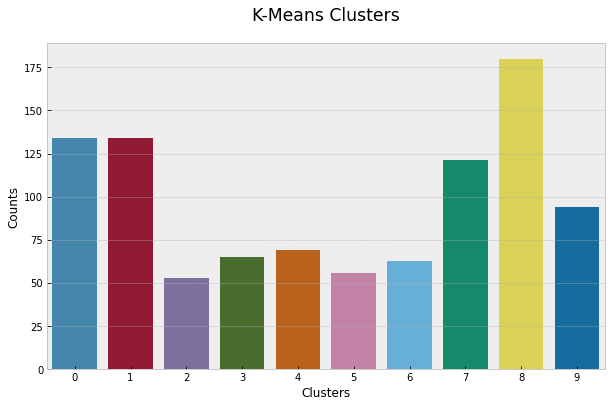

In [22]:
kmeans_labels = k_means(data_check, n_clusters=10)

**Observation:** From the above countplot we can see that there are more number of observations in **cluster #8**. 

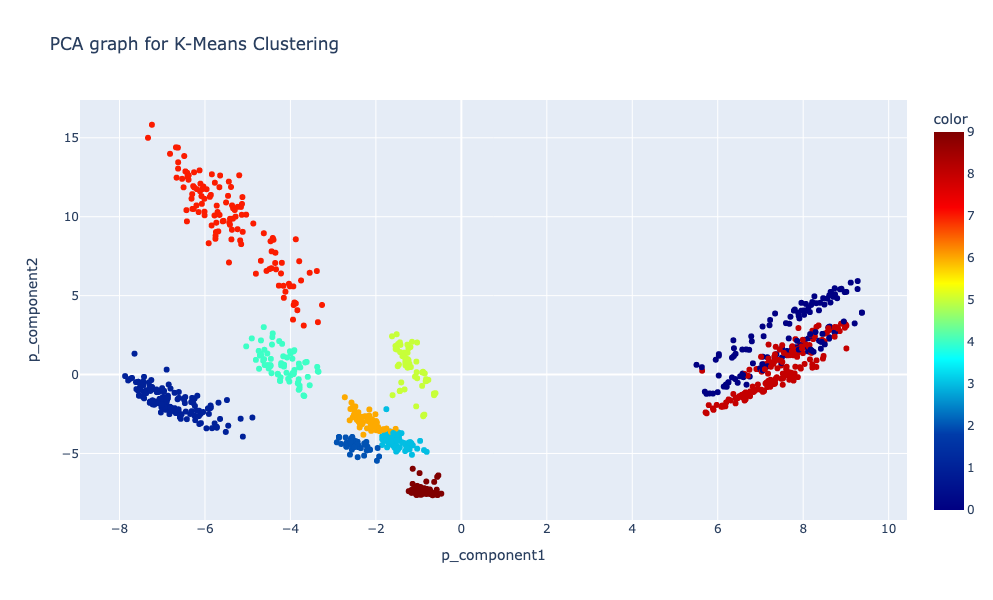

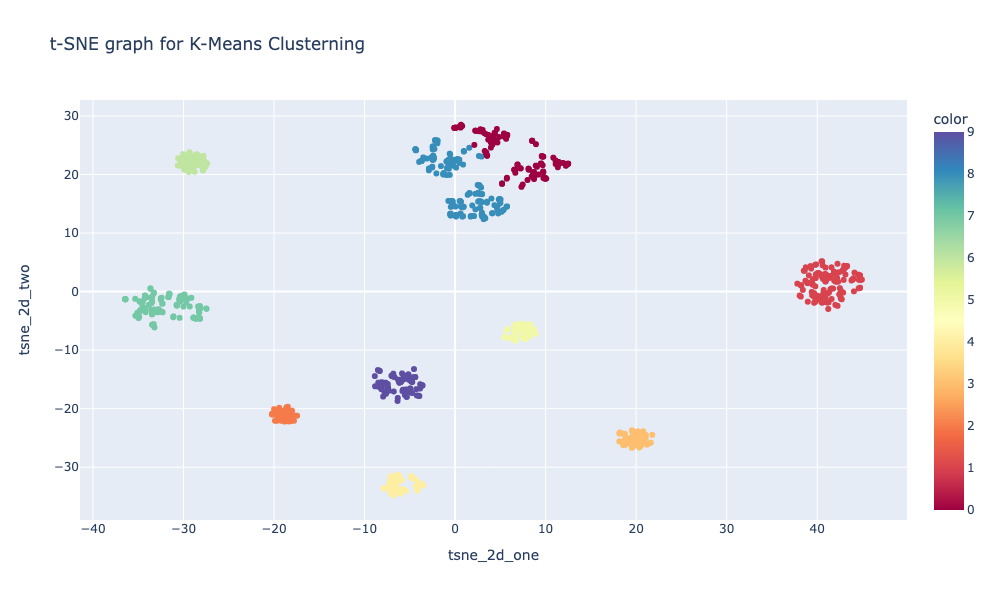

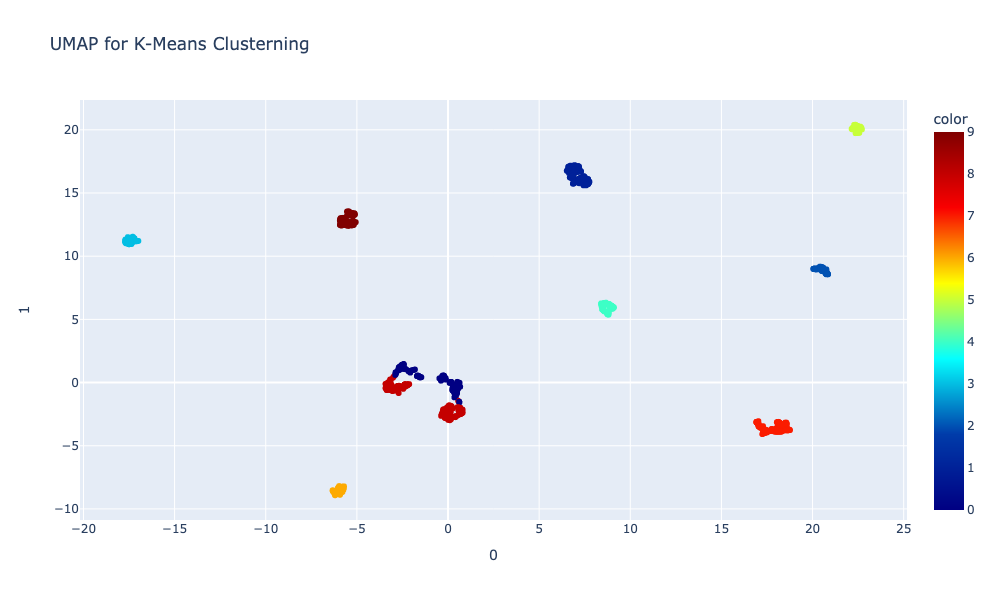

In [23]:
# Plot PCA
plot_pca(kmeans_labels, 'K-Means')

# Plot t-SNE
plot_tsne(kmeans_labels, 'K-Means')

# Plot UMAP
plot_umap(kmeans_labels, 'K-Means')

#### Observation: 
K-Means gives good clustering results with total of 10 clusters. Statistically speaking, **clusters 0, 1, 7, 8** have the highest concentration of data points and rest of the clusters are not that significant. <br>
***PCA is giving a much scattered result and UMAP is giving too much concentrated. But visually, t-SNE gives best results for understanding the results of K-means.*** 

## 5. Agglomerative Clustering / Hierarchical Clustering

In [24]:
aggloclust=AgglomerativeClustering(n_clusters=10).fit(data_check)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5)
agglomerative_labels = aggloclust.labels_

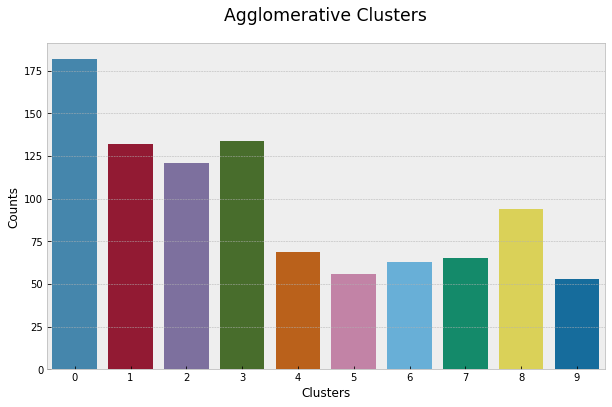

In [25]:
# Graph the plots for calculating cluster size and distribution
plt.figure(figsize=(10,6))
ax = sns.countplot(agglomerative_labels)
ax.set_title("Agglomerative Clusters", fontsize="xx-large", y=1.05)
ax.set_xlabel("Clusters")
ax.set_ylabel("Counts")
plt.show()

**Observation:** From the above countplot we can see that there are more number of observations in **cluster #0**, with inital 4 clusters having the highest data points. But overall the clusters are spread nicely to cover data points properly. 

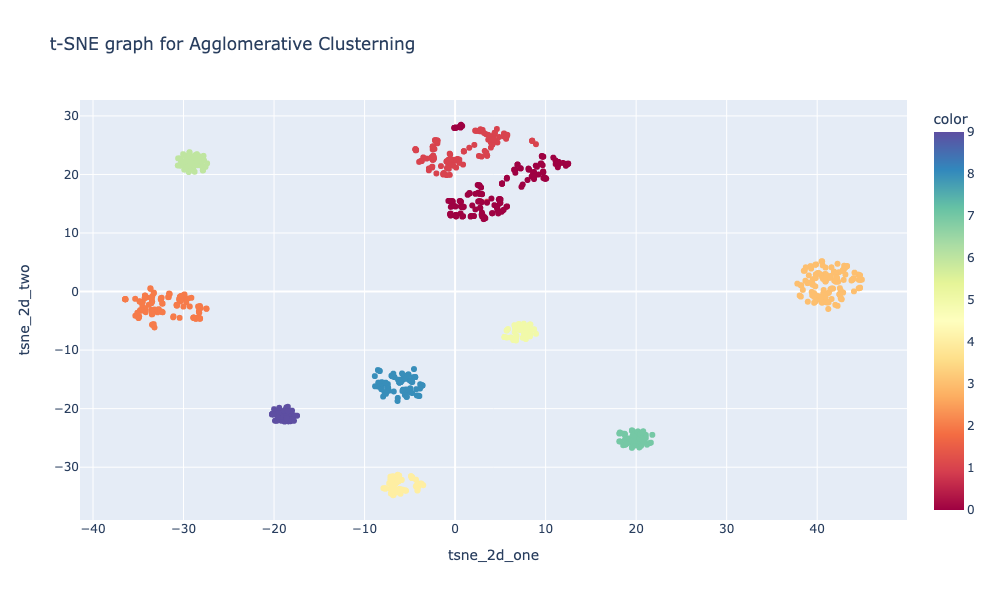

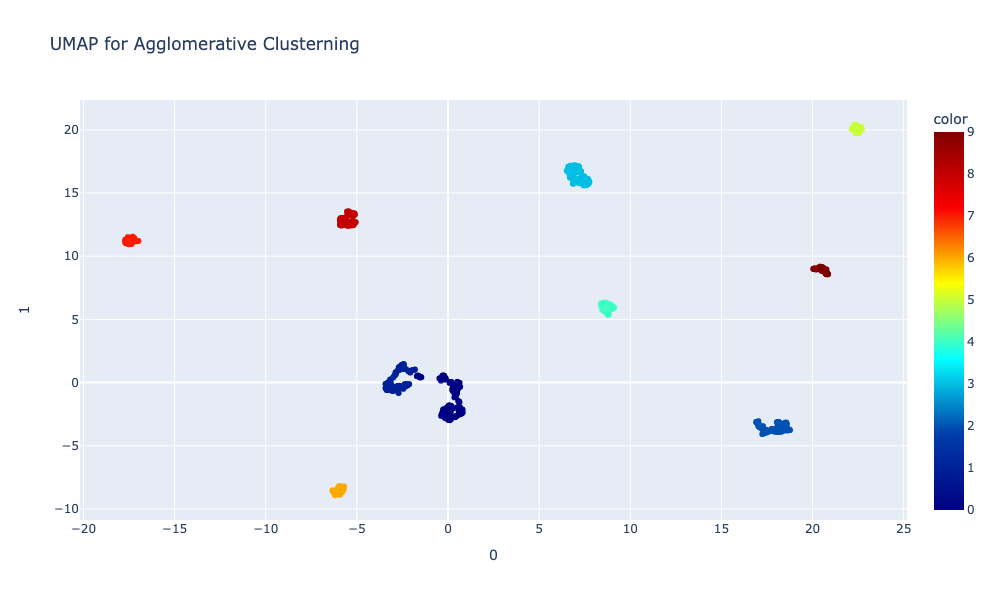

In [26]:
# Plot PCA
# plot_pca(agglomerative_labels, 'Agglomerative')

# Plot t-SNE
plot_tsne(agglomerative_labels, 'Agglomerative')

# Plot UMAP
plot_umap(agglomerative_labels, 'Agglomerative')

For Agglomerative Clustering, I'm only plotting t-SNE and UMPA because scatter plot of PCA is too scattered. <br>
**Observations:** The results from Agglomerative gives out **very nice clusters with very few outliers in the data**, except for clusters 0 and 1 where you can see some spilling of data points. 

## 6. DBSCAN Clustering
Density-Based Spatial Clustering of Application with Noise (DBSCAN)

### 6.A. Epsilon Calculation
Analysis to calculate appropriate epsilon value. 
<br> <br>
Since 'elbow' method does not work DBSCAN, I'm using a custom function to estimate the percentage of outliers at a range of epsilon values. And plotting the percentage of outliers vs epsilon values helped me estimate the epsilon values. 

In [27]:
def elbow_dbscan(start=0.001, end=15, metric='euclidean', sample_size=20):
    outlier_percent = [] 

    for eps in np.linspace(start, end, 50): # check 50 values of epsilon between 0.001 and 3

        # Create Model
        dbscan = DBSCAN(eps=eps, min_samples=sample_size, metric=metric)
        dbscan.fit(data_check)

        # Percentage of points that are outliers
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
        outlier_percent.append(perc_outliers)
        
    sns.lineplot(x=np.linspace(start, end,50),y=outlier_percent, color='green')
    plt.ylabel("Percentage of Points Classified as Outliers")
    plt.xlabel("Epsilon Value");

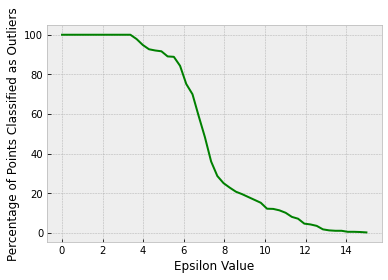

In [28]:
elbow_dbscan(start=0.001, end=15, metric='euclidean', sample_size=20)

The 'elbow' forms somewhere around **epsilon = 13**. <br>
Let's create a model with this epsilon.

### 6.B. DBSCAN Model Creation

In [29]:
def model_dbscan(data, epsilon=0.1, min_samples=20, metric='euclidean'):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric=metric).fit(data)
    
    # Graph the plots for calculating cluster size and distribution
    plt.figure(figsize=(10,6))
    ax = sns.countplot(dbscan.labels_)
    ax.set_title("DBSCAN Clusters", fontsize="xx-large", y=1.05)
    ax.set_xlabel("Clusters")
    ax.set_ylabel("Counts")
    plt.show()
    
    return dbscan.labels_;

### 6.C. DBSCAN - Euclidean Distance Metric

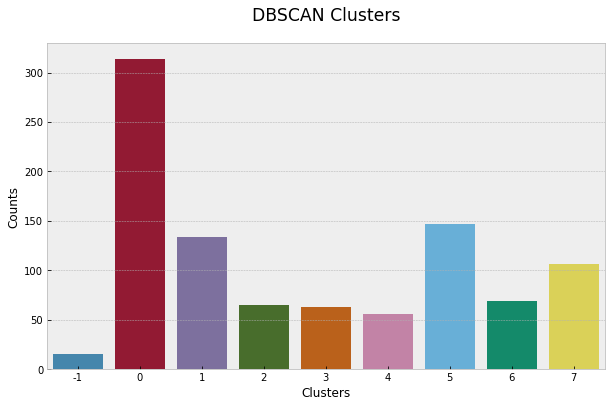

In [30]:
dbscan_label = model_dbscan(data_check, epsilon=13, min_samples=20, metric='euclidean')

**Observations:** There are a **total of 8 clusters** with only a few datapoint coming as outliers. One thing to note is that cluster #1 has the maximum number of data points (approx more than 300). 

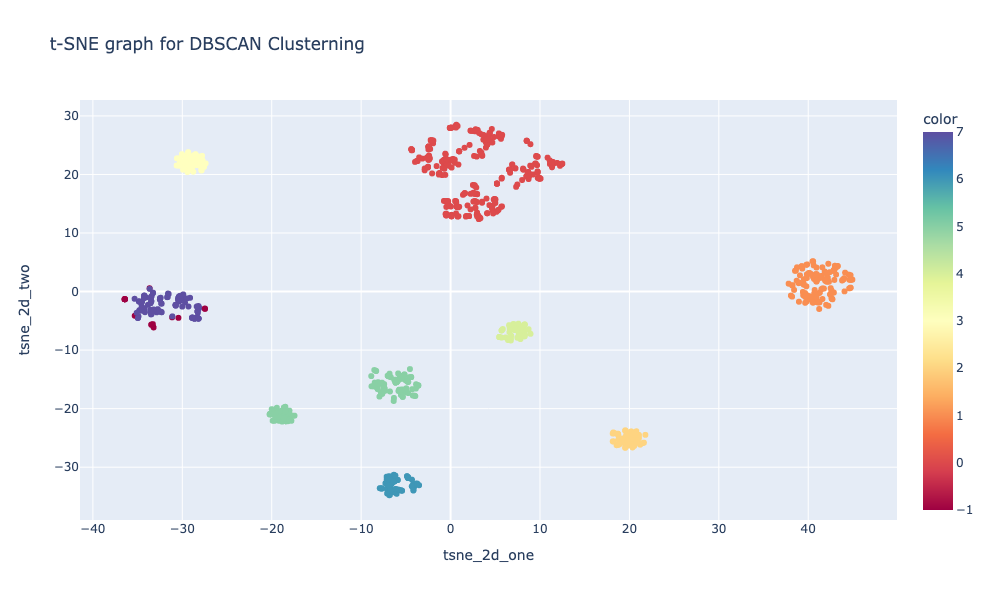

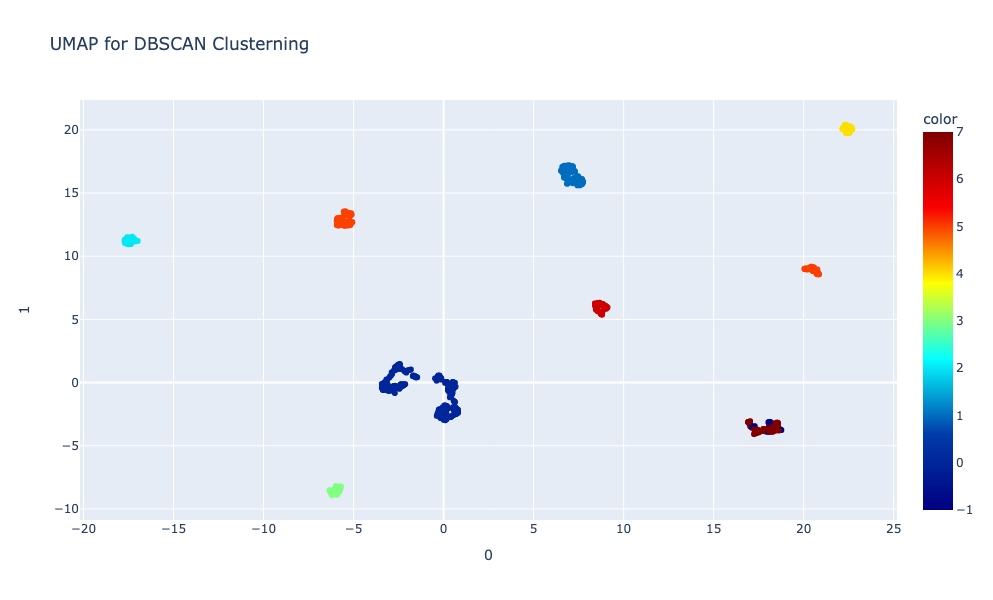

In [31]:
# Plot PCA
# plot_pca(dbscan_label, 'DBSCAN')

# Plot t-SNE
plot_tsne(dbscan_label, 'DBSCAN')

# Plot UMAP
plot_umap(dbscan_label, 'DBSCAN')

### 6.D. DBSCAN - Cosine Distance Metric

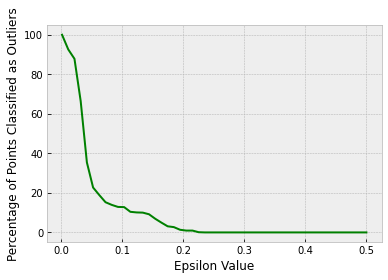

In [32]:
elbow_dbscan(start=0.001, end=0.5, metric='cosine', sample_size=20)

The elbow values form around **epsilon = 0.075**

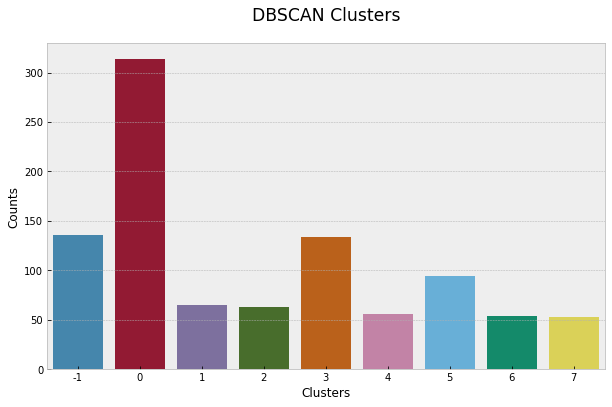

In [33]:
dbscan_label = model_dbscan(data_check, epsilon=0.075, min_samples=15, metric='cosine')

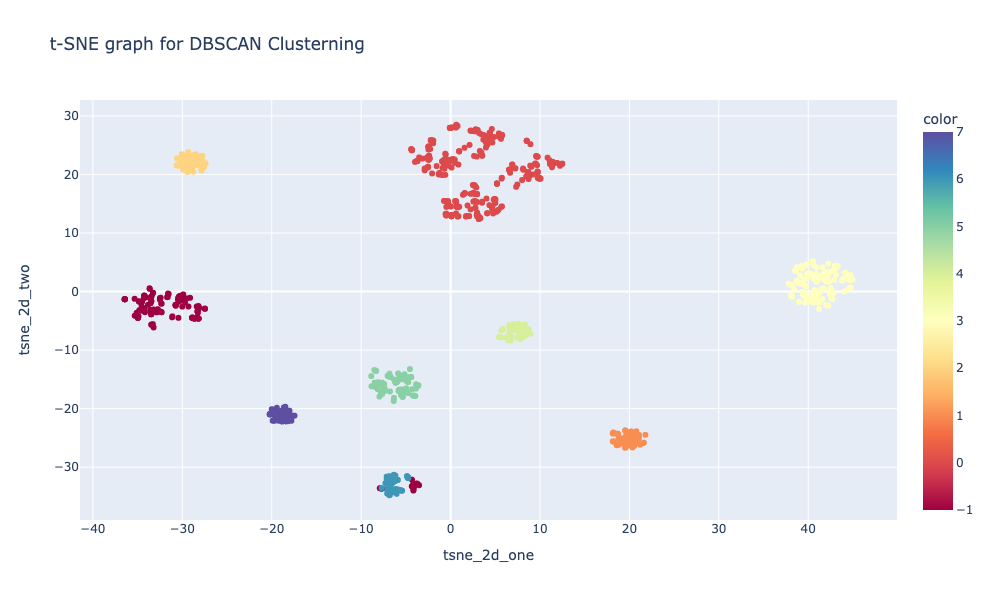

In [34]:
# Plot PCA
# plot_pca(dbscan_label, 'DBSCAN')

# Plot t-SNE
plot_tsne(dbscan_label, 'DBSCAN')

# Plot UMAP
# plot_umap(dbscan_label, 'DBSCAN')

### 6.E. DBSCAN - Manhattan Distance Metric

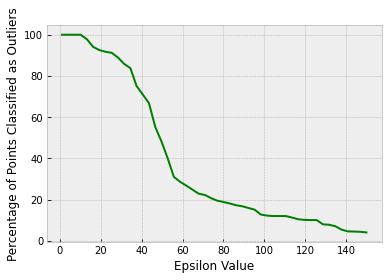

In [35]:
elbow_dbscan(start=1, end=150, metric='manhattan', sample_size=20)

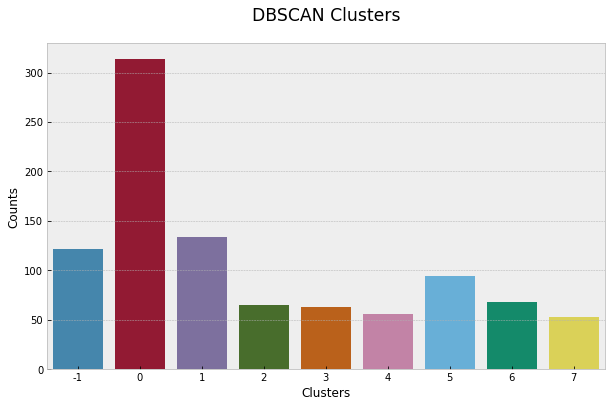

In [36]:
dbscan_label = model_dbscan(data_check, epsilon=150, min_samples=40, metric='manhattan')

update_data_pca = data_pca[dbscan_label!=-1]
update_data_tsne = data_tsne[dbscan_label!=-1]
update_data_umap = proj_2d[dbscan_label!=-1]
dbscan_label = dbscan_label[dbscan_label!=-1]

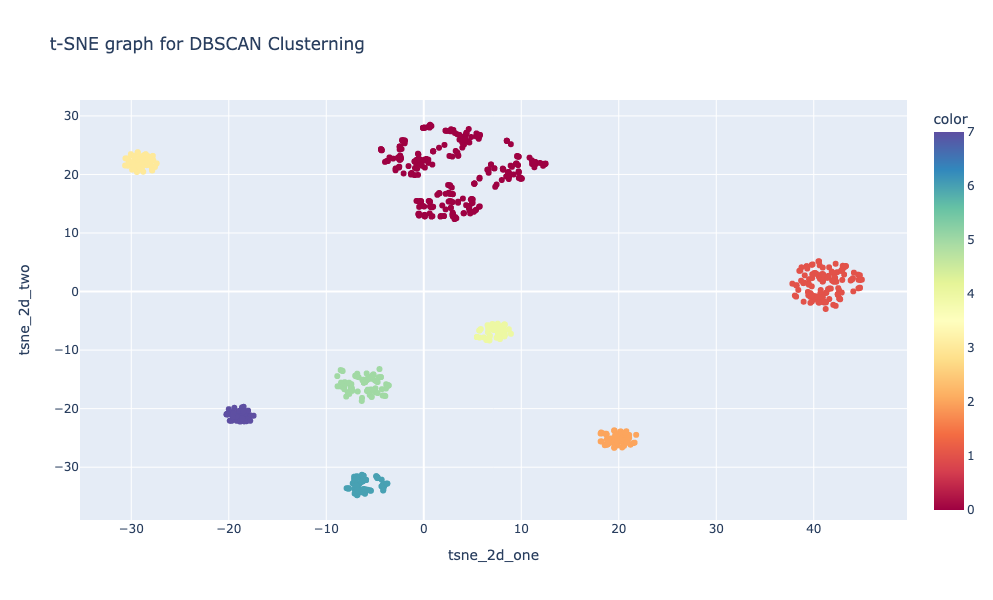

In [37]:
# Plot PCA
# plot_pca(dbscan_label, 'DBSCAN', update_data_pca)

# Plot t-SNE
plot_tsne(dbscan_label, 'DBSCAN', update_data_tsne)

# Plot UMAP
# plot_umap(dbscan_label, 'DBSCAN', update_data_umap)

### 6.F. DBSCAN - Jaccard Distance Metric

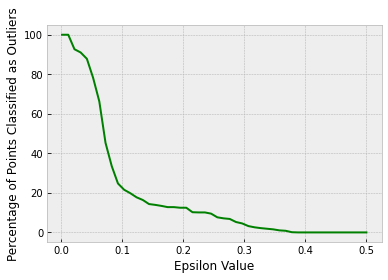

In [38]:
elbow_dbscan(start=0.001, end=0.5, metric='jaccard', sample_size=20)

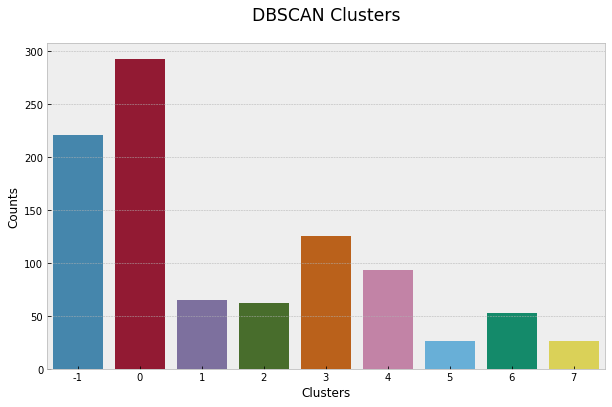

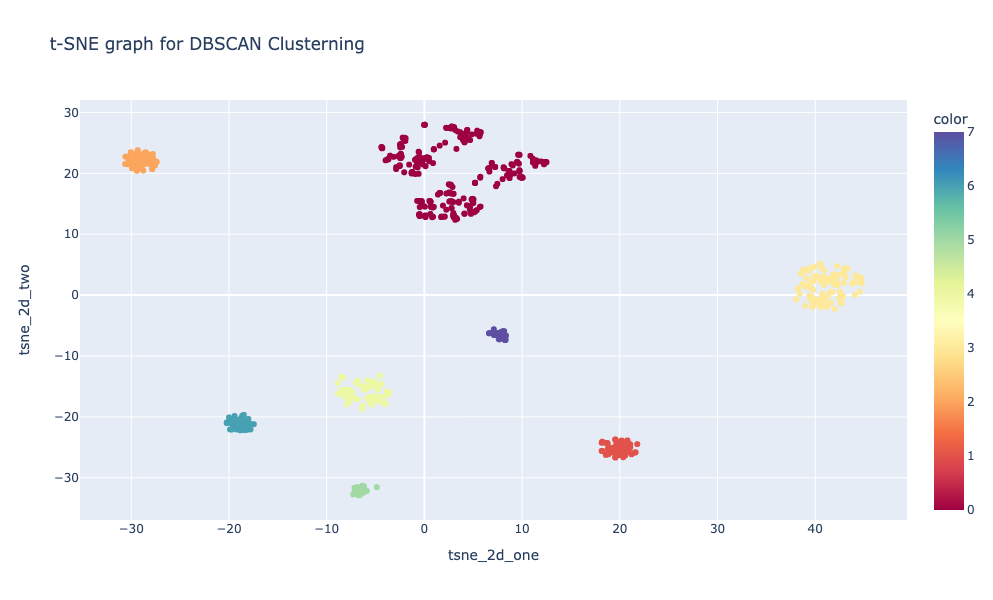

In [39]:
dbscan_label = model_dbscan(data_check, epsilon=0.1, min_samples=20, metric='jaccard')

# Plot PCA
# plot_pca(dbscan_label, 'DBSCAN')

# Plot t-SNE
update_data_tsne = data_tsne[dbscan_label!=-1]
dbscan_label = dbscan_label[dbscan_label!=-1]
plot_tsne(dbscan_label, 'DBSCAN', update_data_tsne)

# Plot UMAP
# plot_umap(dbscan_label, 'DBSCAN')

**Conclusions:** <br>
The overall takeaway from DBSCAN is that almost all of metric clusters (including **'Euclidean', 'Cosine', 'Manhattan', 'Jaccard'**) are certainly better than K-Means and Agglomerative clustering. 
Note: ***In Manhattan and Jaccard we're getting a lot on unassigned data points to any cluster mapping and thus I'm droping the data point from plot which are classified as unassigned by the clustering***. But for the Euclidean and Cosine distance metric with DBSCAN, **I'm not getting a lot of unassigned clusters**. <br>
Also, technically Manhattan and Jaccard work better with binary datasets. After removing the unassigned datasets, we can see that the clusters are nicley separated in the scatter distribution. But for Euclidean and Cosine, they are more conventional distance metric which are not opitmized to work best for binary datasets. 
<br> <br>
Comparing the results from the three different clsutering methods (K-Means, Agglomerative, DBSCAN), it is quite evident that **DBSCAN is much better**. But one thing to notice is that for **Agglomerative clustering I'm getting a split (in the t-SNE graph) for the two clusters that are located at the top of the scatter graph** (at the top two clusters), compared to DBSCAN clustering. This is a debatable split and maybe someone having more domain knowledge can make a better decision in deciding whether that split is justified. 


### ************************************************************************************************************************************

## 7. Writeup: Processing Techniques and Choices
We can divide the overall notebook in 4 major components, namely:
- (i) data loading and cleaning (including removing outliers), 
- (ii) feature selection for clustering,
- (iii) plot function for performing ***PCA, t-SNE, and UMAP***
- (iv) performing clustering using different methods e.g, ***K-Means, Agglomerative, DBSCAN*** while trying out different metric for scoring

#### **Steps 1 to 2: Data loading and cleaning**
- The loaded data is a *.csv file* and has **1025 columns** and **969 rows**. 
- There is one ID column (which is object type), and there are 1024 feature columns in total. 
<br>
- There are no NaN values or any outliers in the data. 

#### **Step 2: Feature Selection**
- From column analysis I can see that there are **74 columns** with one value {0,1}. 
- After dropping such column (along with the ID column), the **final dataset size is (969, 950)**. 

#### **Step 3: Plot Functions**
- So, in order to plot the clusters I'm implmenting three different methods: **PCA, t-SNE, UMAP**
- The reason of creating function is to re-use the same code rather than copy pasting the code for each graph instance.
- I'm reducing each dataset to **two principal components** in each of these methods. 